[View in Colaboratory](https://colab.research.google.com/github/DeepankJain/Machine-Learning/blob/master/Exploratory_Data_Analysis/EDA_of_iris_dataset.ipynb)

Step 1: Dataset : Iris Dataset

Step 2: Objective: Given the 4 features (sepal length, sepal width, petal length and petal width) of a new flower, Our task is to classification that into one of the three species.i.e Iris setosa, Iris versicolor, Iris virginica

    For more information check out https://en.wikipedia.org/wiki/Iris_flower_data_set
    Independent Variable: Sepal Length, Sepal Width, Petal Length, Petal Width
    Dependent Variable: Species 

In [0]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt
from collections  import Counter

In [0]:
#loading iris dataset
iris = sns.load_dataset('iris')

In [0]:
#number of rows and attributes in the dataset
print(iris.shape)

(150, 5)


In [0]:
#name of the attributes
print(iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [0]:
#types of columns in the dataset
print(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None


Step 3: Data Preprocessing:

Real-world data is often incomplete, inconsistent, and/or lacking in certain behaviors or trends, and is likely to contain many errors.

Data preprocessing is a proven method of resolving such issues.

a. Data Cleaning: Data is cleansed through processes such as filling in missing values, smoothing the noisy data, or resolving the inconsistencies in the data.

b. Data Integration: Data with different representations are put together and conflicts within the data are resolved.

c. Data Transformation: Data is normalized, aggregated and generalized.

d. Data Reduction: This step aims to present a reduced representation of the data in a data warehouse.

e. Data Discretization: Involves the reduction of a number of values of a continuous attribute by dividing the range of attribute intervals.

In [0]:
#checking for missing values
print(iris['sepal_length'].isnull().value_counts())
print(iris['sepal_width'].isnull().value_counts())
print(iris['petal_length'].isnull().value_counts())
print(iris['petal_width'].isnull().value_counts())

False    150
Name: sepal_length, dtype: int64
False    150
Name: sepal_width, dtype: int64
False    150
Name: petal_length, dtype: int64
False    150
Name: petal_width, dtype: int64


In [0]:
#alternate way of checking missing values
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [0]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [0]:
iris.describe(include = 'object')

,species
count,150
unique,3
top,setosa
freq,50


In [0]:
#count the datapoints for each class
#using value counts
iris['species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

In [0]:
#using Counter function of collection class
#Counter function returns a dictionary
Counter(iris['species'])

Counter({'setosa': 50, 'versicolor': 50, 'virginica': 50})

Balanced and Unbalanced dataset. Balanced dataset: Where the number of observations belonging to each class is almost equal. Unbalanced dataset: Where the number of observations belonging to one class is significantly lower than those belonging to the other classes.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


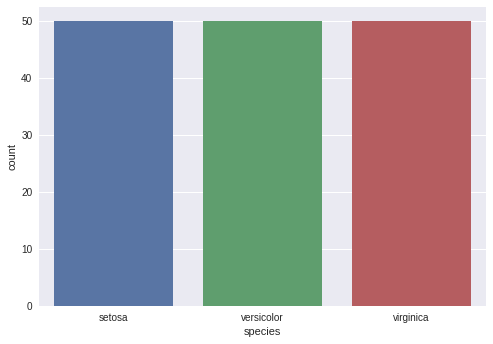

In [0]:
sns.countplot(iris['species'])
plt.show()

In [0]:
plt.close()

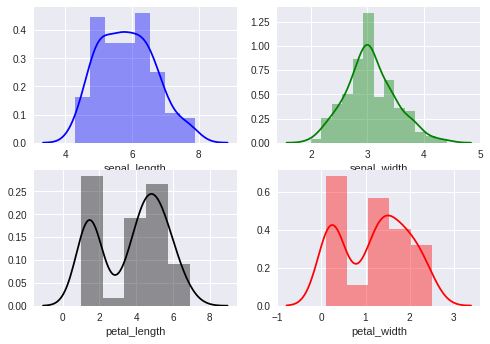

In [0]:
#histograms of independent variables
plt.subplot(221)
sns.distplot(iris['sepal_length'], color = 'b')
plt.subplot(222)
sns.distplot(iris['sepal_width'], color = 'g')
plt.subplot(223)
sns.distplot(iris['petal_length'], color = 'k')
plt.subplot(224)
sns.distplot(iris['petal_width'], color = 'r')
plt.show()

In [0]:
plt.close()

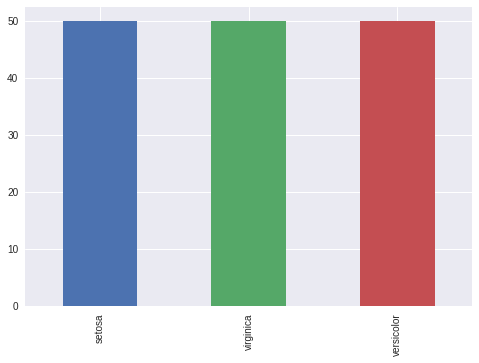

In [0]:
#bar plot of species count
iris['species'].value_counts().plot(kind = 'bar')
plt.show()

In [0]:
plt.close()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


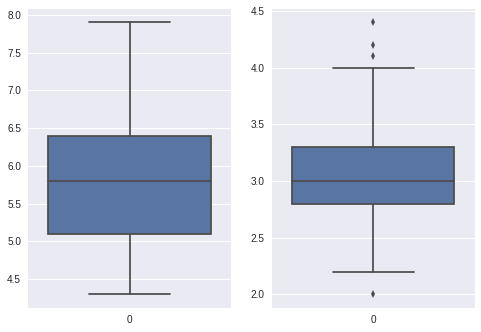

In [0]:
#creating boxplot
plt.subplot(121)
sns.boxplot(data = iris['sepal_length'])
plt.subplot(122)
sns.boxplot(data = iris['sepal_width'])
plt.show()

In [0]:
plt.close()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


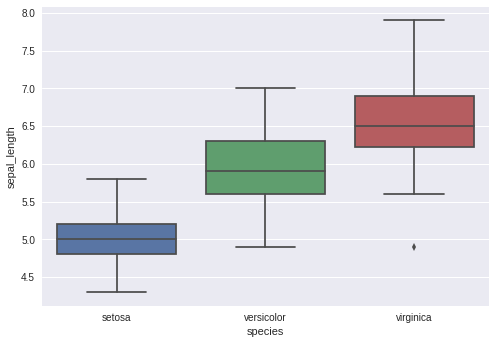

In [0]:
#draw a vertical box plot grouped by a categoriacal variable
sns.boxplot(x = 'species', y = 'sepal_length', data = iris)
plt.show()

In [0]:
plt.close()

Normalization or standardization: It means adjusting values measured on different scales to a notionally common scale.

Types of Normalization: 
    1. Standard score is used when population parameters are known. 
       It Works well for populations that are normally distributed.
       X = ((X - mean)/(s.d))
    2. Feature scaling is used to bring all values into the range [0,1]. 
       This is also called unity-based normalization.
       X = ((X - Xmin)/(Xmax - Xmin))

In [0]:
#normalization
#feature scaling
iris['sepal_length'] = iris['sepal_length'] - iris['sepal_length'].min()/iris['sepal_length'].max() - iris['sepal_length'].min()
iris['sepal_width'] = iris['sepal_width'] - iris['sepal_width'].min()/iris['sepal_width'].max() - iris['sepal_width'].min()
iris['petal_length'] = iris['petal_length'] - iris['petal_length'].min()/iris['petal_length'].max() - iris['petal_length'].min()
iris['petal_width'] = iris['petal_width'] - iris['petal_width'].min()/iris['petal_width'].max() - iris['petal_width'].min()
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.255696,1.045455,0.255072,0.06,setosa
1,0.055696,0.545455,0.255072,0.06,setosa
2,-0.144304,0.745455,0.155072,0.06,setosa
3,-0.244304,0.645455,0.355072,0.06,setosa
4,0.155696,1.145455,0.255072,0.06,setosa


Step 5: Bivariate Data Analysis

In [0]:
# Suppose we want to see how the observations in our sample 
# are distributed in the context of two variables.
# To do so, we can build a contingency table using the crosstab method:
pd.crosstab(iris['sepal_length'], iris['species'])

species,setosa,versicolor,virginica
sepal_length,,,
-0.544304,1,0,0
-0.444304,3,0,0
-0.344304,1,0,0
-0.244304,4,0,0
-0.144304,2,0,0
-0.044304,5,0,0
0.055696,4,1,1
0.155696,8,2,0
0.255696,8,1,0
